In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read Prostate data

In [7]:
df = pd.read_csv('data/prostate.data',sep='\t')

In [8]:
df.columns

Index(['Unnamed: 0', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp',
       'gleason', 'pgg45', 'lpsa', 'train'],
      dtype='object')

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df_train = df[df['train']=='T'].reset_index(drop=True)
df_test = df[df['train']=='F'].reset_index(drop=True)

## Correlation matrix

In [11]:
corr=df_train.corr()
corr.round(3).style.background_gradient(cmap='coolwarm')

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1,0.3,0.286,0.063,0.593,0.692,0.426,0.483,0.733
lweight,0.3,1,0.317,0.437,0.181,0.157,0.024,0.074,0.485
age,0.286,0.317,1,0.287,0.129,0.173,0.366,0.276,0.228
lbph,0.063,0.437,0.287,1,-0.139,-0.089,0.033,-0.03,0.263
svi,0.593,0.181,0.129,-0.139,1,0.671,0.307,0.481,0.557
lcp,0.692,0.157,0.173,-0.089,0.671,1,0.476,0.663,0.489
gleason,0.426,0.024,0.366,0.033,0.307,0.476,1,0.757,0.342
pgg45,0.483,0.074,0.276,-0.03,0.481,0.663,0.757,1,0.448
lpsa,0.733,0.485,0.228,0.263,0.557,0.489,0.342,0.448,1


# Fit linear model lpsa ~ lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45

## standardized features to have unit variance

In [12]:
from sklearn import preprocessing
feature_list = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

In [13]:
scaler = preprocessing.StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[feature_list]), columns=feature_list)
df_test_scaled = pd.DataFrame(scaler.transform(df_test[feature_list]), columns=feature_list)

df_train_scaled['lpsa'] = df_train['lpsa']
df_test_scaled['lpsa'] = df_test['lpsa']

In [14]:
df_train_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,67.000000
mean,4.308328e-17,-4.971148e-18,-8.343243e-16,6.628197e-18,3.976918e-17,-4.308328e-17,4.921436e-16,-3.314099e-17,2.452345
std,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.007547e+00,1.207812
min,-2.157304e+00,-2.645075e+00,-3.189126e+00,-1.003472e+00,-5.370862e-01,-8.430840e-01,-1.039499e+00,-9.032532e-01,-0.430783
25%,-6.691190e-01,-6.252199e-01,-5.031242e-01,-1.003472e+00,-5.370862e-01,-8.430840e-01,-1.039499e+00,-9.032532e-01,1.667306
50%,1.251804e-01,-5.798078e-02,3.407614e-02,-8.448679e-02,-5.370862e-01,-4.202897e-01,3.818568e-01,-3.874751e-01,2.568788
75%,8.396889e-01,5.443671e-01,5.712765e-01,1.016091e+00,-5.370862e-01,8.696292e-01,3.818568e-01,8.160072e-01,3.365188
max,2.033202e+00,2.440170e+00,1.914277e+00,1.552196e+00,1.861899e+00,2.065078e+00,3.224568e+00,2.535268e+00,5.477509


In [15]:
df_test_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.095740,0.019378,-0.382254,0.064359,-0.057289,0.081023,0.097586,-0.209818,2.536547
std,0.840554,0.636143,0.945937,0.994212,0.975998,1.016637,1.081828,0.878424,1.042035
min,-1.694681,-1.608889,-2.920526,-1.003472,-0.537086,-0.843084,-1.039499,-0.903253,0.765468
25%,-0.419189,-0.309628,-0.637424,-1.003472,-0.537086,-0.843084,-1.039499,-0.903253,1.864393
50%,0.106276,0.051599,-0.100224,0.252507,-0.537086,-0.155786,0.381857,-0.628172,2.591516
75%,0.599712,0.447602,0.403401,1.033480,-0.537086,0.935755,0.381857,0.300229,2.882004
max,1.750187,1.047216,0.705577,1.445522,1.861899,2.243039,3.224568,2.191416,5.582932


## Fitting linear model: sklearn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression().fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

In [18]:
print(reg.intercept_, reg.coef_)

2.4523450850746267 [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]


## Fitting linear model: statsmodel

In [19]:
formula = 'lpsa ~ ' + ' + '.join(feature_list)
formula

'lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45'

In [20]:
import statsmodels.formula.api as smf
ols = smf.ols(formula = formula, data = df_train_scaled)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Thu, 28 May 2020   Prob (F-statistic):           2.04e-12
Time:                        10:22:52   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4523      0.087     28.182      0.0

In [34]:
squared_error = (ols_result.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
test_error = np.mean(squared_error)
std_error = np.std(squared_error, ddof=1)/np.sqrt(len(df_test_scaled))

In [39]:
df_result = pd.DataFrame(ols_result.params,columns=['LS'])
df_result.loc['test_error'] = test_error
df_result.loc['std_error'] = std_error

In [40]:
df_result

,LS
Intercept,2.452345
lcavol,0.711041
lweight,0.290450
age,-0.141482
lbph,0.210420
svi,0.307300
lcp,-0.286841
gleason,-0.020757
pgg45,0.275268
test_error,0.521274


In [41]:
# Without intercept
import statsmodels.formula.api as smf
ols = smf.ols(formula = formula + ' - 1', data = df_train_scaled)
ols_result = ols.fit()
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   lpsa   R-squared (uncentered):                   0.134
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              1.140
Date:                Thu, 28 May 2020   Prob (F-statistic):                       0.351
Time:                        10:31:57   Log-Likelihood:                         -157.53
No. Observations:                  67   AIC:                                      331.1
Df Residuals:                      59   BIC:                                      348.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Ridge regression: $\min_{b,\beta \in R^p} \|y - X\beta - b\|_2^2 + \alpha \|\beta\|_2^2$

In [42]:
from sklearn.linear_model import Ridge

In [43]:
reg = Ridge(alpha=1.0)
reg.fit(df_train_scaled[feature_list],df_train_scaled['lpsa'])

Ridge()

In [44]:
print(reg.intercept_, reg.coef_)

2.4523450850746267 [ 0.68540969  0.28959545 -0.13430643  0.20841057  0.30162494 -0.25453234
 -0.0112517   0.25598543]


## Step 1: map degree of freedom to regularizer coefficients 

In [45]:
# find all singular values
from sklearn.decomposition import PCA
pca = PCA(n_components = len(feature_list)) 
pca.fit(df_train_scaled[feature_list])
d = pca.singular_values_

In [46]:
def compute_dof(d,lbd):
    '''
        degree of freedom = \sum_i \frac{d_i^2}{d_i^2 + lbd}
    '''
    return (d**2/(d**2+lbd)).sum()

def find_lambda(d, dof_target):
    '''
        Binary search to find lbd that achieves dof_target
    '''
    left = 0
    right = 1e8
    while (right-left>1):
        mid = left + (right-left)/2
        dof = compute_dof(d, mid)
        if dof < dof_target:
            right = mid
        else:
            left = mid
    return mid

In [47]:
alphas = []
for dof in range(9):
    alphas.append(find_lambda(d,dof))

In [48]:
alphas

[99999999.25494194,
 412.0171070098877,
 157.20725059509277,
 78.2310962677002,
 42.46830940246582,
 23.096799850463867,
 11.175870895385742,
 5.21540641784668,
 0.7450580596923828]

## Step 2: Cross Validation to pick the regularization coefficient alpha by “one-standard-error” rule

In [51]:
from sklearn.model_selection import KFold
df = pd.DataFrame()
K=10
kf = KFold(n_splits=K,shuffle=True, random_state=69438)
kf.get_n_splits(df_train_scaled)

for i in range(len(alphas)):
    reg = Ridge(alpha=alphas[i])
    train_mse = []
    test_mse = []
    predict_mse = []
    
    for train_index, test_index in kf.split(df_train_scaled):
        reg.fit(df_train_scaled.loc[train_index][feature_list], df_train_scaled.loc[train_index]['lpsa'])
        train_mse.append(((reg.predict(df_train_scaled.loc[train_index][feature_list]) - df_train_scaled.loc[train_index]['lpsa'])**2).mean())
        test_mse.append(((reg.predict(df_train_scaled.loc[test_index][feature_list]) - df_train_scaled.loc[test_index]['lpsa'])**2).mean())
        predict_mse.append(((reg.predict(df_test_scaled[feature_list])-df_test_scaled['lpsa'])**2).mean())
    
    df = df.append({'dof': i, 'train_mse': np.array(train_mse).mean(), 'test_mse': np.array(test_mse).mean(), 'test_mse_se': np.array(test_mse).std()/np.sqrt(K), \
                    'predict_mse': np.array(predict_mse).mean()}, ignore_index=True)

Text(0, 0.5, 'CV MSE')

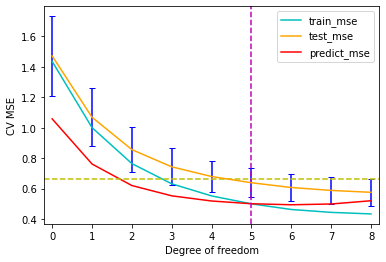

In [52]:
ax = df.plot(x='dof',y='train_mse', color='c')
df.plot(x='dof',y='test_mse', yerr='test_mse_se', color='orange', ax=ax, capsize=3, ecolor='blue')
df.plot(x='dof', y='predict_mse', ax=ax, color='r')
ax.set_xlim(left=-0.2,right=8.2)
idx = df['test_mse'].idxmin()
ax.axhline(y=df.eval('test_mse + test_mse_se').loc[idx], ls='--', color='y')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['dof'].min(), ls='--', color = 'm')
ax.set_xlabel('Degree of freedom')
ax.set_ylabel('CV MSE')

## Step 3: Train full model next using picked alpha value

In [93]:
coef = []
intercept = []
df_testerror = pd.DataFrame()
for i in range(len(alphas)):
    reg = Ridge(alpha=alphas[i])
    
    reg.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
    coef.append(list(reg.coef_))
    intercept.append(reg.intercept_)
    
    squared_errors = (reg.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
    df_testerror = df_testerror.append({'dof':i, 'test_error': np.mean(squared_errors), 'std_error': np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))}, ignore_index=True)

In [94]:
df_coef = pd.DataFrame(coef,columns=feature_list)

In [95]:
df_coef['Intercept'] = intercept

In [96]:
df_coef['dof'] = [i for i in range(9)]

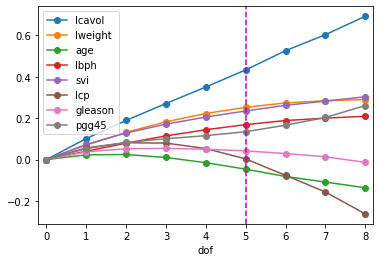

In [97]:
ax = df_coef.drop(columns=['Intercept']).plot(x='dof', marker='o')
ax.set_xlim(left=-0.2,right=8.2)
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['dof'].min(), ls='--', color = 'm')

In [112]:
df_ridgeres = df_coef[df_coef['dof']==5].T.rename(columns={5:'Ridge'})
df_ridgeres.loc['test_error'] = df_testerror.loc[5,'test_error']
df_ridgeres.loc['std_error'] = df_testerror.loc[5,'std_error']
df_ridgeres = df_ridgeres.drop(['dof'])

In [116]:
df_result = pd.concat([df_result,df_ridgeres], axis=1, sort = False)

# Lasso regression: $\min_{b,\beta\in R^p, \|\beta\|_1 \leq t} \|y-X\beta-b\|_2^2$
> Sklearn solves the Lagranian relaxation problem: $\min_{b,\beta\in R^p} \|y-X\beta-b\|_2^2 + \alpha  \|\beta\|_1$

In [119]:
from sklearn.linear_model import Lasso

In [120]:
reg = LinearRegression().fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
reg.coef_

array([ 0.71104059,  0.29045029, -0.14148182,  0.21041951,  0.30730025,
       -0.28684075, -0.02075686,  0.27526843])

In [121]:
np.linalg.norm(reg.coef_, ord=1)

2.24355850754002

In [122]:
lasso = Lasso(alpha=0.0001)
lasso.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])

Lasso(alpha=0.0001)

In [123]:
lasso.coef_

array([ 0.71069524,  0.29042003, -0.1413067 ,  0.21030232,  0.30711583,
       -0.28618748, -0.02032945,  0.27461805])

## Step 1: map lasso regularization coef to shrinkage factor

In [124]:
df_map = pd.DataFrame()
baseline = np.linalg.norm(reg.coef_, ord=1)

alphalist = [i/10000.0 for i in range(1,10000)]
for i in alphalist:
    lasso = Lasso(alpha=i)
    lasso.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
    df_map = df_map.append({'alpha': i, 'coef_l1': np.linalg.norm(lasso.coef_, ord=1), 'shrinkage_factor': np.linalg.norm(lasso.coef_, ord=1)/baseline}, ignore_index=True)

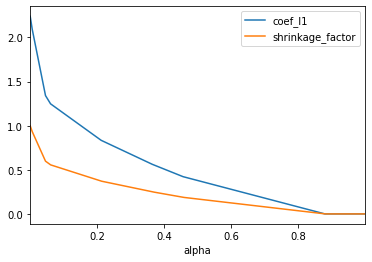

In [125]:
ax = df_map.plot(x='alpha', y='coef_l1')
df_map.plot(x='alpha', y='shrinkage_factor', ax=ax)

In [126]:
alphalist = []
slist = []
for i in range(11):
    target = i/10.0
    slist.append(target)
    alphalist.append(df_map.loc[np.abs(df_map['shrinkage_factor']-target).idxmin()]['alpha'])

In [127]:
alphalist

[0.8789,
 0.6545,
 0.4386,
 0.3021,
 0.1885,
 0.1068,
 0.0452,
 0.0335,
 0.0218,
 0.01,
 0.0001]

## Step2: Cross Validation to pick the regularization coefficient alpha by “one-standard-error” rule

In [128]:
df = pd.DataFrame()
K=10
kf = KFold(n_splits=K,shuffle=True, random_state=69438)
kf.get_n_splits(df_train_scaled)

for i in range(len(alphalist)):
    lasso = Lasso(alpha=alphalist[i])
    train_mse = []
    test_mse = []
    predict_mse = []
    
    for train_index, test_index in kf.split(df_train_scaled):
        lasso.fit(df_train_scaled.loc[train_index][feature_list], df_train_scaled.loc[train_index]['lpsa'])
        train_mse.append(((lasso.predict(df_train_scaled.loc[train_index][feature_list]) - df_train_scaled.loc[train_index]['lpsa'])**2).mean())
        test_mse.append(((lasso.predict(df_train_scaled.loc[test_index][feature_list]) - df_train_scaled.loc[test_index]['lpsa'])**2).mean())
        predict_mse.append(((lasso.predict(df_test_scaled[feature_list])-df_test_scaled['lpsa'])**2).mean())
    
    df = df.append({'shrinkage': slist[i], 'train_mse': np.array(train_mse).mean(), 'test_mse': np.array(test_mse).mean(), 'test_mse_se': np.array(test_mse).std()/np.sqrt(K), \
                    'predict_mse': np.array(predict_mse).mean()}, ignore_index=True)

Text(0, 0.5, 'CV MSE')

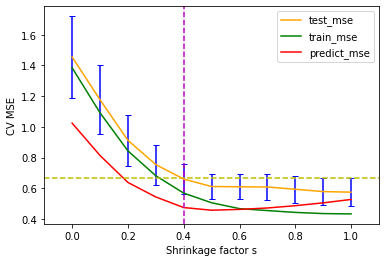

In [129]:
ax = df.plot(x='shrinkage', y='test_mse', yerr='test_mse_se',capsize=3, color='orange', ecolor='blue')
df.plot(x='shrinkage', y='train_mse', color='g', ax=ax)
df.plot(x='shrinkage', y='predict_mse', color='r', ax=ax)
ax.set_xlim(left=-0.1, right=1.1)

idx = df['test_mse'].idxmin()
ax.axhline(y=df.eval('test_mse + test_mse_se').loc[idx], ls='--', color='y')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['shrinkage'].min(), ls='--', color = 'm')
ax.set_xlabel('Shrinkage factor s')
ax.set_ylabel('CV MSE')

## Step 3: Train full model using the selected alpha by cross validation

In [157]:
coef = []
intercept = []
df_testerror = pd.DataFrame()
for i in range(len(alphalist)):
    lasso = Lasso(alpha=alphalist[i])
    
    lasso.fit(df_train_scaled[feature_list], df_train_scaled['lpsa'])
    coef.append(list(lasso.coef_))
    intercept.append(lasso.intercept_)
    
    squared_errors = (lasso.predict(df_test_scaled[feature_list]) - df_test_scaled['lpsa'])**2
    df_testerror = df_testerror.append({'shrinkage':slist[i], 'test_error': np.mean(squared_errors), 'std_error': np.std(squared_errors, ddof=1)/np.sqrt(len(df_test_scaled))}, ignore_index=True)

In [158]:
intercept

[2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267,
 2.4523450850746267]

In [159]:
df_coef = pd.DataFrame(coef,columns=feature_list)
df_coef['Intercept'] = intercept
df_coef['shrinkage'] = slist

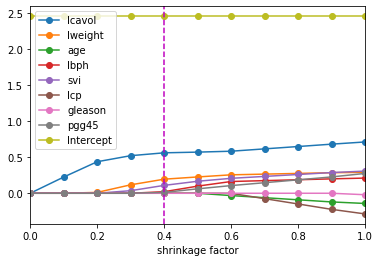

In [160]:
ax = df_coef.plot(x='shrinkage', marker='o')
ax.set_xlabel('shrinkage factor')
ax.axvline(x=df[df['test_mse']<df.eval('test_mse + test_mse_se').loc[idx]]['shrinkage'].min(), ls='--', color = 'm')

In [161]:
df_lassores = df_coef[df_coef['shrinkage']==0.4].T.rename(columns={4:'Lasso'})
df_lassores.loc['test_error'] = df_testerror.loc[4,'test_error']
df_lassores.loc['std_error'] = df_testerror.loc[4,'std_error']
df_lassores = df_lassores.drop(['shrinkage'])

In [162]:
df_lassores

,Lasso
lcavol,0.560203
lweight,0.194887
age,0.000000
lbph,0.021667
svi,0.109014
lcp,0.000000
gleason,0.000000
pgg45,0.011666
Intercept,2.452345
test_error,0.468676


In [167]:
df_result = pd.concat([df_result,df_lassores], axis=1, sort = False)

In [168]:
df_result

,LS,Ridge,Lasso
Intercept,2.452345,2.452345,2.452345
lcavol,0.711041,0.432815,0.560203
lweight,0.290450,0.252017,0.194887
age,-0.141482,-0.046407,0.000000
lbph,0.210420,0.168537,0.021667
svi,0.307300,0.234399,0.109014
lcp,-0.286841,0.002985,0.000000
gleason,-0.020757,0.041893,0.000000
pgg45,0.275268,0.134372,0.011666
test_error,0.521274,0.492480,0.468676


## Subset_selection

In [184]:
feature_list

['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

### Forward-stepwise